# Библиотеки

In [ ]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Загрузка датасета

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! unzip /content/drive/MyDrive/train.zip -d train

! unzip /content/drive/MyDrive/test.zip -d test

In [ ]:
file_list_test = []
file_list_train = []
for dirname, _, filenames in os.walk('/content/test'):
    for filename in filenames:
        file_list_test.append(os.path.join(dirname, filename))


for dirname, _, filenames in os.walk('/content/train'):
    for filename in filenames:
        file_list_train.append(os.path.join(dirname, filename))

In [ ]:
time_file = pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
print(len(file_list_train))
print(len(file_list_test))
print(len(time_file))

4432
4520
4431


In [ ]:
time_file

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429
...,...,...
4426,873340274,15695097
4427,1297437712,35659379
4428,694853998,31206935
4429,1886987043,9598270


# Анализ одного датасета train

In [ ]:
df=pd.read_csv(file_list_train[3])

In [ ]:
df

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,-3022.0,647.0,-1550.0,-228.0,-83.0,-5046.0,1929.0,-1855.0,-295.0,-2492.0
1,-3025.0,773.0,-1508.0,-326.0,-110.0,-5009.0,1904.0,-1840.0,-336.0,-2600.0
2,-3011.0,590.0,-1478.0,-427.0,-153.0,-4987.0,1865.0,-1755.0,-365.0,-2662.0
3,-3005.0,281.0,-1445.0,-546.0,-190.0,-4983.0,1807.0,-1849.0,-395.0,-2686.0
4,-2989.0,48.0,-1403.0,-631.0,-202.0,-4927.0,1746.0,-1759.0,-443.0,-2668.0
...,...,...,...,...,...,...,...,...,...,...
59996,1141.0,137.0,405.0,-506.0,152.0,-377.0,-568.0,-1415.0,-239.0,557.0
59997,1167.0,24.0,364.0,-502.0,181.0,-417.0,-589.0,-1395.0,-205.0,590.0
59998,1177.0,-25.0,381.0,-506.0,212.0,-482.0,-614.0,-1516.0,-194.0,620.0
59999,1177.0,-18.0,364.0,-488.0,251.0,-458.0,-645.0,-1557.0,-175.0,657.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60001 entries, 0 to 60000
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_1   60001 non-null  float64
 1   sensor_2   0 non-null      float64
 2   sensor_3   0 non-null      float64
 3   sensor_4   60001 non-null  float64
 4   sensor_5   60001 non-null  float64
 5   sensor_6   60001 non-null  float64
 6   sensor_7   60001 non-null  float64
 7   sensor_8   60001 non-null  float64
 8   sensor_9   59425 non-null  float64
 9   sensor_10  60001 non-null  float64
dtypes: float64(10)
memory usage: 4.6 MB


<Axes: >

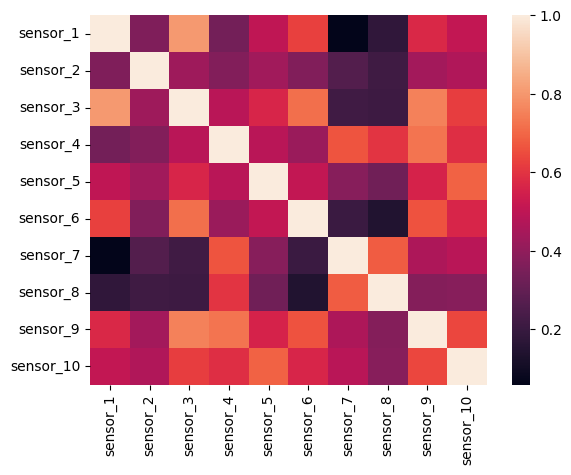

In [ ]:
sns.heatmap(df.corr())

# Анализ time_file

<ipython-input-31-4e749fa0ee63>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_file['time_to_eruption'],


<Axes: xlabel='time_to_eruption', ylabel='Density'>

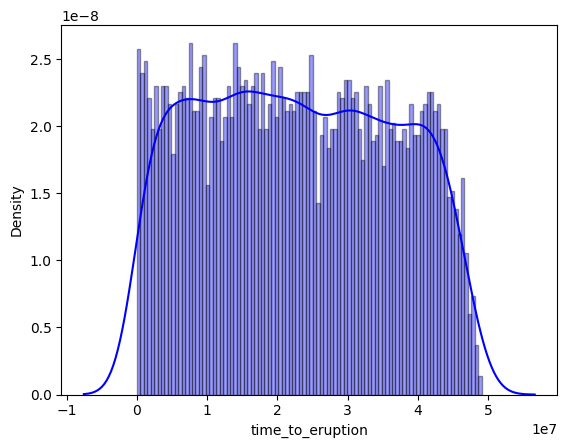

In [ ]:
sns.distplot(time_file['time_to_eruption'],
            hist=True,
            kde=True,
            bins=100,
            color='blue',
            hist_kws={'edgecolor':'black'})

# Анализ Nan train

In [ ]:
keys = list(pd.read_csv(file_list_train[0]).keys())
nanC = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for index in range(len(file_list_train)):
    df = pd.read_csv(file_list_train[index])
    for key in df.keys():
        if df[key].isna().sum() == len(pd.read_csv(file_list_train[0])):
            nanC[keys.index(key)] += 1

print(nanC)
data={'sensors': keys, 'count': nanC}
NaNDF = pd.DataFrame(data)
print(NaNDF)

<Axes: xlabel='sensors'>

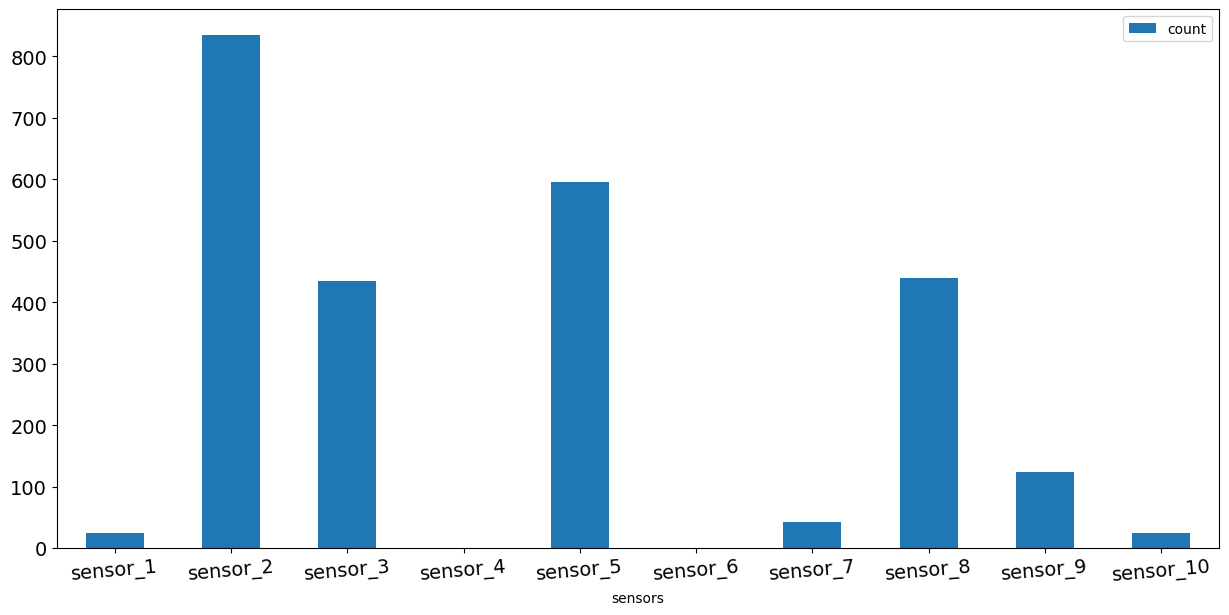

In [ ]:
NaNDF.plot(figsize =(15, 7), x="sensors", y="count", kind="bar",  rot=5, fontsize=14 )

# Анализ Nan test

In [ ]:
keys = list(pd.read_csv(file_list_test[0]).keys())
nanC = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for index in range(len(file_list_test)):
    df = pd.read_csv(file_list_test[index])
    for key in df.keys():
        if df[key].isna().sum() == len(pd.read_csv(file_list_test[0])):
            nanC[keys.index(key)] += 1

print(nanC)
data={'sensors': keys, 'count': nanC}
NaNDF = pd.DataFrame(data)
print(NaNDF)

[387, 1257, 434, 0, 1388, 0, 34, 294, 817, 760]
     sensors  count
0   sensor_1    387
1   sensor_2   1257
2   sensor_3    434
3   sensor_4      0
4   sensor_5   1388
5   sensor_6      0
6   sensor_7     34
7   sensor_8    294
8   sensor_9    817
9  sensor_10    760


<Axes: xlabel='sensors'>

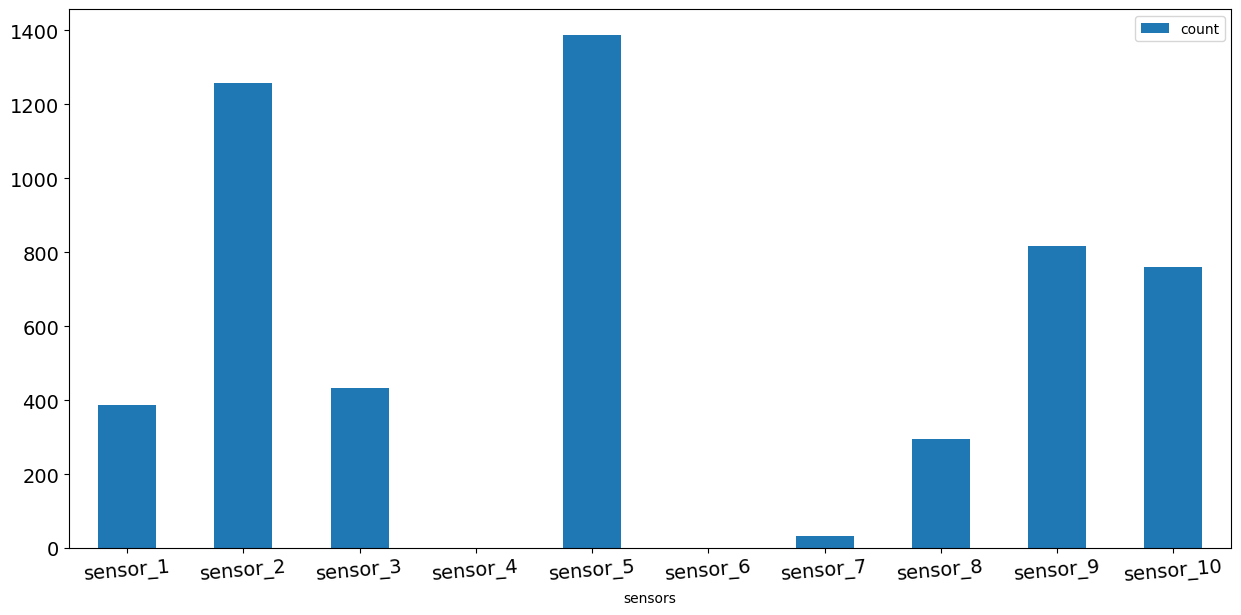

In [ ]:
NaNDF.plot(figsize =(15, 7), x="sensors", y="count", kind="bar",  rot=5, fontsize=14 )

# Сборка датасета

In [ ]:
dataMask = ["sum", "mean", "std", "max", "min", "skew", "quantile99", "quantile90", "quantile70",  "quantile20", "quantile10"]
metaDataDict = {}
for column in pd.read_csv(file_list_train[1]).keys():
    for mask in dataMask:
        metaDataDict[f"{column}_{mask}"] = []

In [ ]:
for file in tqdm.tqdm(time_file["segment_id"]):
    data = pd.read_csv(f"/content/train/{file}.csv")
    for column in data.keys():
        if np.isnan(data[column]).any():
            metaDataDict[f"{column}_sum"].append(0)
            metaDataDict[f"{column}_mean"].append(0)
            metaDataDict[f"{column}_std"].append(0)
            metaDataDict[f"{column}_max"].append(0)
            metaDataDict[f"{column}_min"].append(0)
            metaDataDict[f"{column}_skew"].append(0)
            metaDataDict[f"{column}_quantile99"].append(0)
            metaDataDict[f"{column}_quantile90"].append(0)
            metaDataDict[f"{column}_quantile70"].append(0)
            metaDataDict[f"{column}_quantile20"].append(0)
            metaDataDict[f"{column}_quantile10"].append(0)
        else:
            metaDataDict[f"{column}_sum"].append(data[column].sum()) #сумма
            metaDataDict[f"{column}_mean"].append(data[column].mean()) # среднее
            metaDataDict[f"{column}_std"].append(data[column].std()) # стандартное отклонение
            metaDataDict[f"{column}_max"].append(data[column].max()) # максимум
            metaDataDict[f"{column}_min"].append(data[column].min()) # минимум
            metaDataDict[f"{column}_skew"].append(data[column].skew()) # коэффициент асимметрии
            metaDataDict[f"{column}_quantile99"].append(np.quantile(data[column], 0.99)) #99% значений находятся ниже этого значения.
            metaDataDict[f"{column}_quantile90"].append(np.quantile(data[column], 0.90))
            metaDataDict[f"{column}_quantile70"].append(np.quantile(data[column], 0.70))
            metaDataDict[f"{column}_quantile20"].append(np.quantile(data[column], 0.20))
            metaDataDict[f"{column}_quantile10"].append(np.quantile(data[column], 0.10))

100%|██████████| 4431/4431 [12:51<00:00,  5.74it/s]


In [ ]:
for key in metaDataDict.keys():
    time_file[key] = metaDataDict[key]

<ipython-input-45-f2d79d01b0e8>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  time_file[key] = metaDataDict[key]
<ipython-input-45-f2d79d01b0e8>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  time_file[key] = metaDataDict[key]
<ipython-input-45-f2d79d01b0e8>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

In [ ]:
time_file = time_file.drop("segment_id", axis=1)

# Анализ полученного датасета

<Axes: >

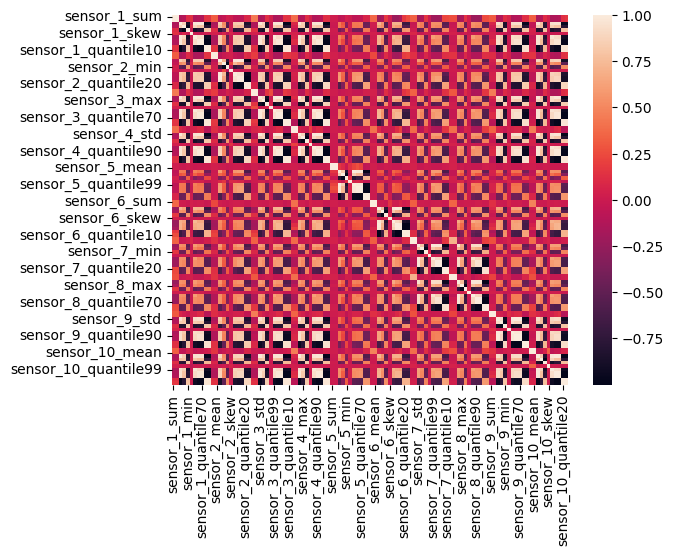

In [ ]:
corr_matrix=time_file.drop("time_to_eruption", axis=1).corr()
sns.heatmap(corr_matrix)

In [ ]:
mask = (corr_matrix > 0.98)
mask.values[range(len(mask)), range(len(mask))] = False

high_corr_columns = mask.any(axis=0)
result_columns = corr_matrix.columns[high_corr_columns]

print(len(result_columns))
result_columns

73


Index(['sensor_1_sum', 'sensor_1_mean', 'sensor_1_std', 'sensor_1_quantile90',
       'sensor_1_quantile70', 'sensor_1_quantile20', 'sensor_1_quantile10',
       'sensor_2_sum', 'sensor_2_mean', 'sensor_2_std', 'sensor_2_quantile99',
       'sensor_2_quantile90', 'sensor_2_quantile70', 'sensor_2_quantile20',
       'sensor_2_quantile10', 'sensor_3_sum', 'sensor_3_mean', 'sensor_3_std',
       'sensor_3_quantile99', 'sensor_3_quantile90', 'sensor_3_quantile70',
       'sensor_3_quantile20', 'sensor_3_quantile10', 'sensor_4_sum',
       'sensor_4_mean', 'sensor_4_std', 'sensor_4_quantile99',
       'sensor_4_quantile90', 'sensor_4_quantile70', 'sensor_4_quantile20',
       'sensor_4_quantile10', 'sensor_5_sum', 'sensor_5_mean', 'sensor_5_std',
       'sensor_5_quantile99', 'sensor_5_quantile90', 'sensor_5_quantile70',
       'sensor_5_quantile20', 'sensor_5_quantile10', 'sensor_6_sum',
       'sensor_6_mean', 'sensor_6_std', 'sensor_6_quantile90',
       'sensor_6_quantile70', 'sensor_6_

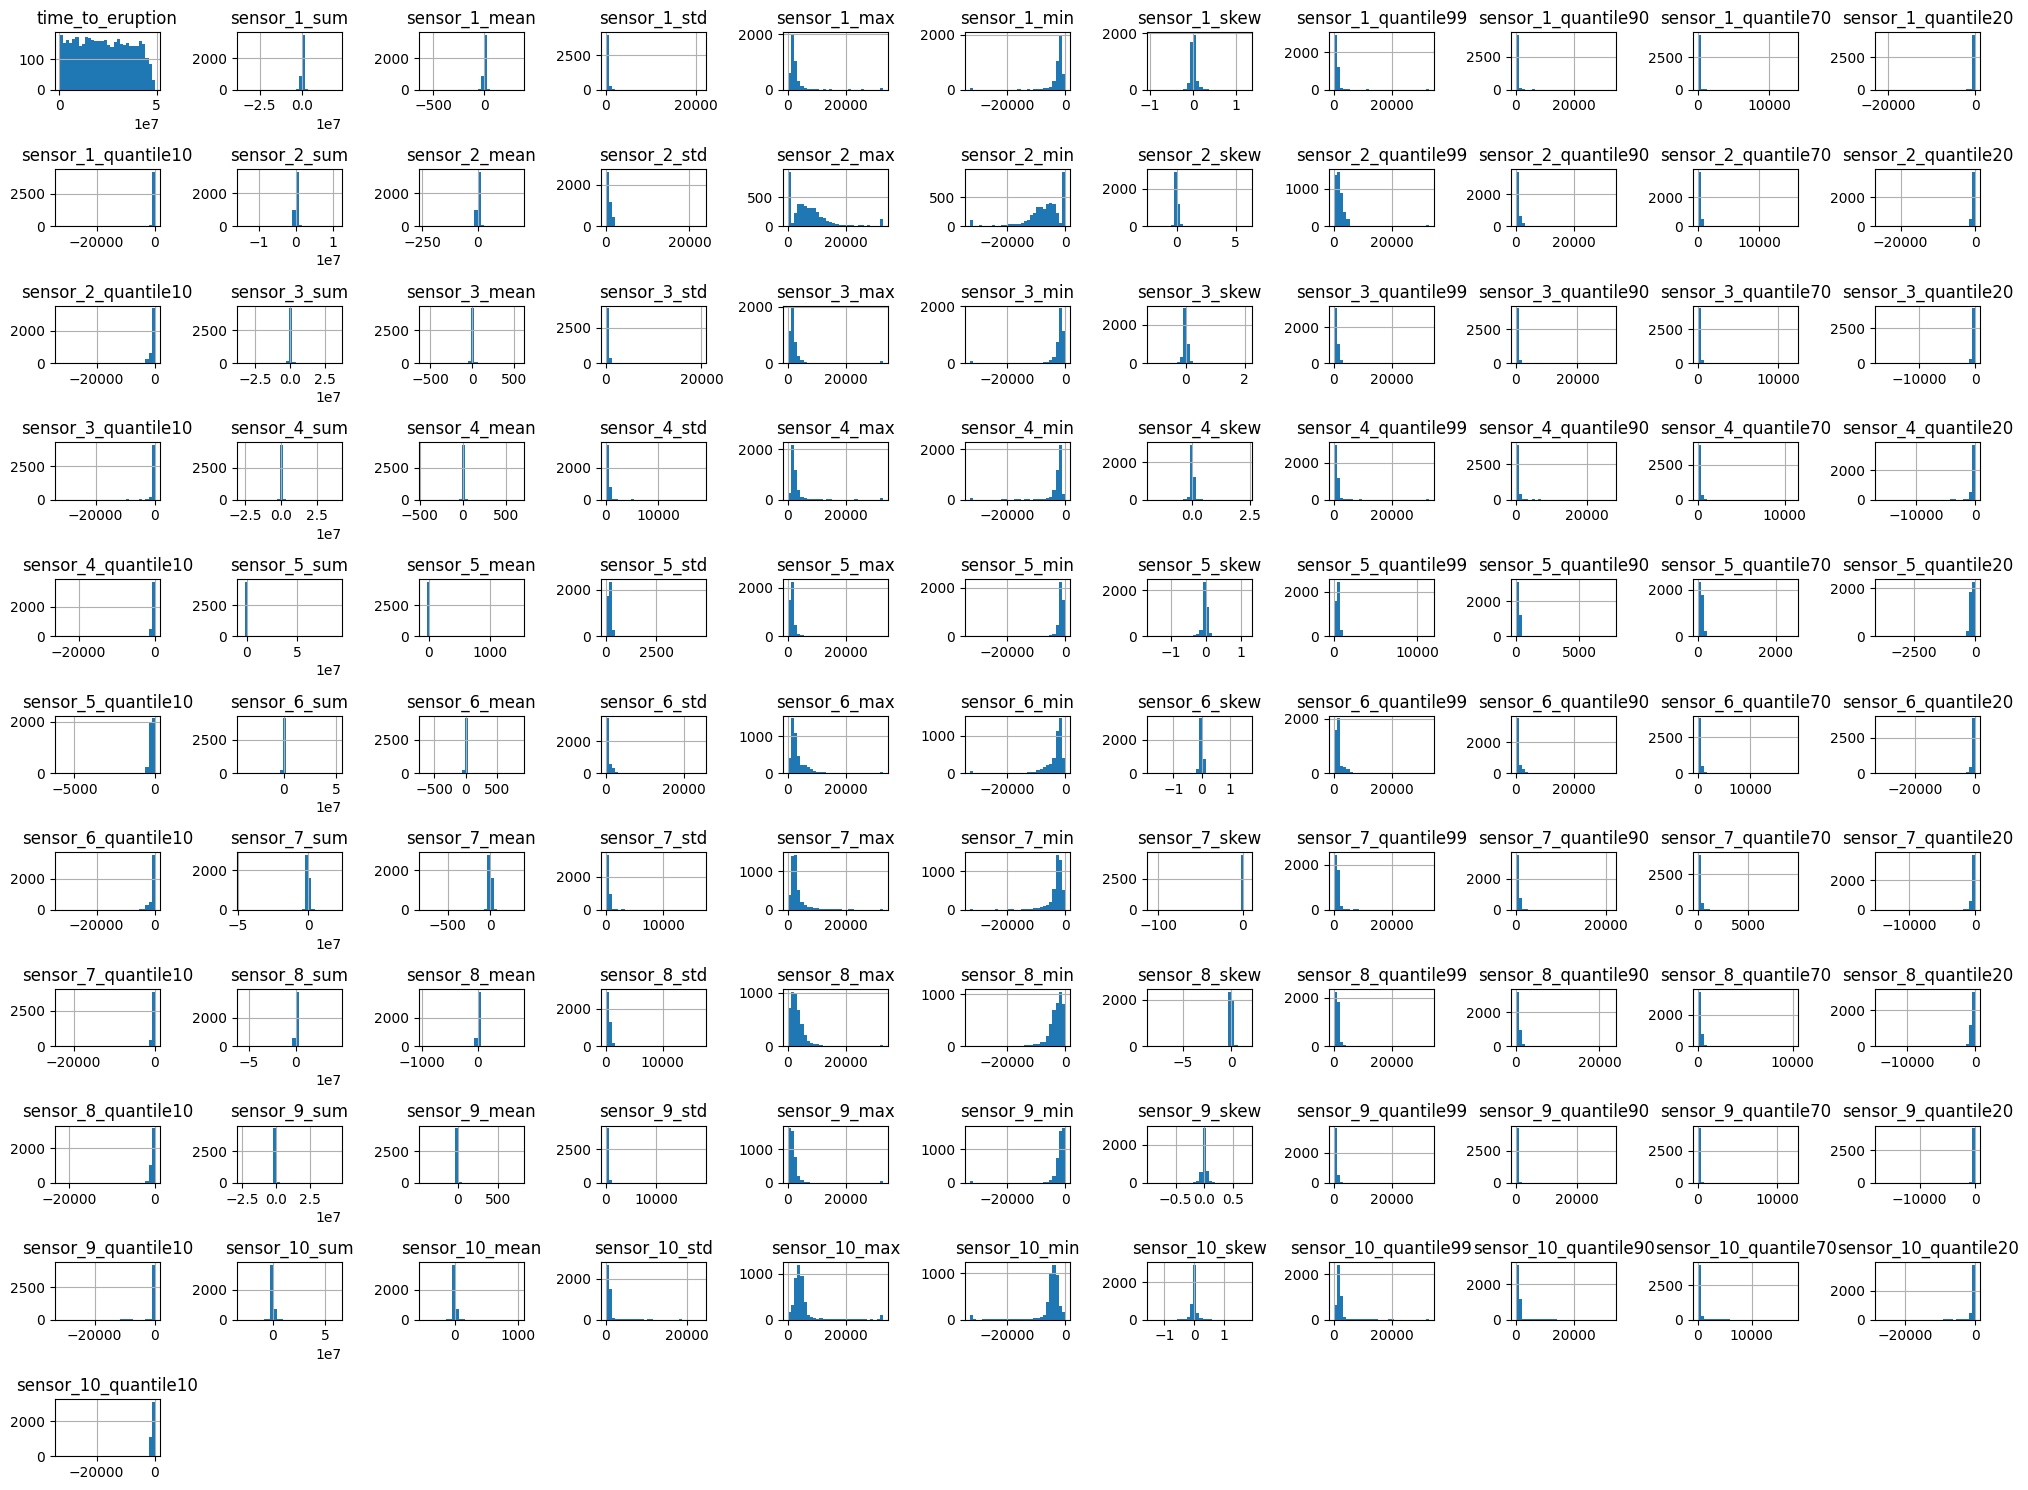

In [ ]:
time_file.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()